In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:\\Users\\XNovaQ.18\\Documents\\jupenv\\jupyter_repo\\student_info.csv")

In [7]:
df

,Student_ID,Name,Department,Marks_Math,Marks_English,Marks_Science,Attendance
0,1001,Ganesh,CSE,72.0,87.0,59.0,94.0
1,1002,Divya,EEE,79.0,40.0,48.0,91.0
2,1003,Karthik,CSE,78.0,69.0,46.0,88.0
3,1004,Hema,EEE,57.0,94.0,92.0,63.0
4,1005,Ekansh,ECE,79.0,75.0,48.0,80.0
...,...,...,...,...,...,...,...
115,1116,Karthik,MECH,83.0,50.0,82.0,77.0
116,1117,Ekansh,MECH,NaN,47.0,52.0,86.0
117,1118,Jothi,EEE,69.0,84.0,45.0,90.0
118,1119,Ganesh,EEE,68.0,NaN,86.0,85.0


In [9]:
#Missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Student_ID        0
Name              0
Department        0
Marks_Math       12
Marks_English    12
Marks_Science    12
Attendance       12
dtype: int64


In [10]:
#Remove rows with >2 nulls
df = df[df.isnull().sum(axis=1) <= 2].copy()
#Convert columns to numeric
for col in ["Marks_Math", "Marks_English", "Marks_Science", "Attendance"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [12]:
df["Marks_Math"] = df["Marks_Math"].fillna(df["Marks_Math"].mean())
df["Marks_English"] = df["Marks_English"].fillna(df["Marks_English"].median())
df["Marks_Science"] = df["Marks_Science"].fillna(df["Marks_Science"].mode()[0])


In [13]:
#Total Marks
df["Total_Marks"] = df["Marks_Math"] + df["Marks_English"] + df["Marks_Science"]

In [14]:
#Performance Level
def performance(t):
    if t >= 240:
        return "High"
    elif t >= 180:
        return "Medium"
    else:
        return "Low"

df["Performance_Level"] = df["Total_Marks"].apply(performance)

In [15]:
#Top 5 students per department
top5 = df.sort_values(["Department", "Total_Marks"], ascending=[True, False])\
         .groupby("Department").head(5)
print("Top 5 Per Department:\n", top5, "\n")

Top 5 Per Department:
      Student_ID     Name Department  Marks_Math  Marks_English  Marks_Science  \
23         1024  Bhuvana      CIVIL   99.000000           76.0           96.0   
32         1033     Arun      CIVIL   98.000000           66.0           98.0   
58         1059   Ekansh      CIVIL   74.000000           94.0           90.0   
99         1100     Arun      CIVIL   66.000000           94.0           91.0   
92         1093     Hema      CIVIL   77.000000           88.0           66.0   
62         1063    Latha        CSE   85.000000           70.0           96.0   
88         1089     Hema        CSE   94.000000           86.0           65.0   
59         1060  Bhuvana        CSE   64.000000           92.0           80.0   
119        1120    Jothi        CSE   85.000000           76.0           68.0   
19         1020  Bhuvana        CSE   65.000000           67.0           93.0   
94         1095   Ishaan        ECE   84.000000           94.0           84.0   
21   

In [16]:
#Departments with avg attendance < 75%
dept_attendance = df.groupby("Department")["Attendance"].mean()
low_att = dept_attendance[dept_attendance < 75]
print("Departments with avg attendance < 75%:", list(low_att.index), "\n")

Departments with avg attendance < 75%: ['CIVIL', 'CSE', 'ECE'] 



In [18]:
#Correlation per department
corrs = {dept: group[["Marks_Math", "Marks_English", "Marks_Science"]].corr()
         for dept, group in df.groupby("Department")}

In [19]:
#Students scoring >90 in any subject
high_scorers = df[["Marks_Math", "Marks_English", "Marks_Science"]].gt(90).any(axis=1)
print("Students scoring >90:", df[high_scorers], "\n")

Students scoring >90:      Student_ID     Name Department  Marks_Math  Marks_English  Marks_Science  \
3          1004     Hema        EEE        57.0           94.0           92.0   
7          1008  Charles       MECH        67.0           63.0           91.0   
13         1014    Divya      CIVIL        69.0           94.0           30.0   
17         1018    Farah        ECE        99.0           66.0           45.0   
19         1020  Bhuvana        CSE        65.0           67.0           93.0   
20         1021     Hema        ECE        87.0           37.0           92.0   
21         1022    Latha        ECE        96.0           52.0           98.0   
22         1023    Farah        EEE        91.0           59.0           51.0   
23         1024  Bhuvana      CIVIL        99.0           76.0           96.0   
26         1027     Arun        EEE        40.0           92.0           80.0   
29         1030    Farah      CIVIL        44.0           80.0           98.0   
31    

In [21]:
#Outliers in Science (IQR)
Q1 = df["Marks_Science"].quantile(0.25)
Q3 = df["Marks_Science"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
science_outliers = df[(df["Marks_Science"] < lower) | (df["Marks_Science"] > upper)]
print("Science Outliers:\n", science_outliers, "\n")

Science Outliers:
 Empty DataFrame
Columns: [Student_ID, Name, Department, Marks_Math, Marks_English, Marks_Science, Attendance, Total_Marks, Performance_Level]
Index: [] 



In [22]:
#Pivot table
pivot_tbl = pd.pivot_table(
    df,
    index="Department",
    values=["Marks_Math", "Marks_English", "Marks_Science"],
    aggfunc=["max", "min", "mean"]
)
print("Pivot Table:\n", pivot_tbl, "\n")

Pivot Table:
                      max                                    min             \
           Marks_English Marks_Math Marks_Science Marks_English Marks_Math   
Department                                                                   
CIVIL               94.0       99.0          98.0          37.0       44.0   
CSE                 92.0       94.0          97.0          38.0       40.0   
ECE                 94.0       99.0          98.0          36.0       51.0   
EEE                 94.0       95.0          98.0          40.0       40.0   
MECH                92.0       99.0          98.0          35.0       43.0   

                                  mean                           
           Marks_Science Marks_English Marks_Math Marks_Science  
Department                                                       
CIVIL               30.0     70.777778  67.993827     69.777778  
CSE                 30.0     70.827586  66.618135     59.068966  
ECE                 39.0     66

In [23]:
#Replace null Attendance with random 50–90
null_count = df["Attendance"].isnull().sum()
df.loc[df["Attendance"].isnull(), "Attendance"] = np.random.randint(50, 91, size=null_count)

In [24]:
#Sort students
df = df.sort_values(["Department", "Total_Marks"], ascending=[True, False])

Matplotlib is building the font cache; this may take a moment.


NameError: name 'plt' is not defined

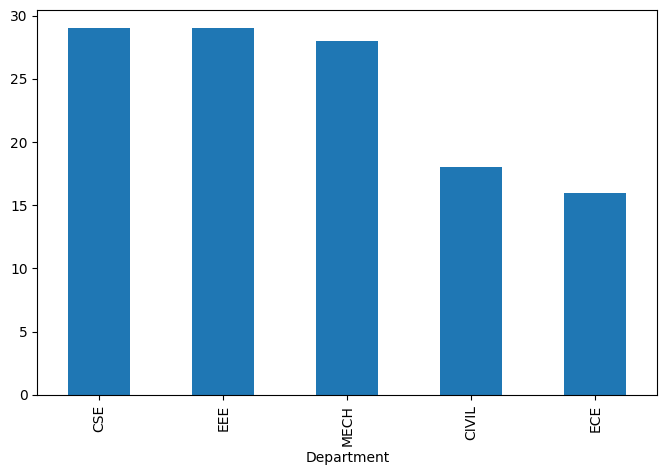

In [28]:
#Plot students count vs department
df["Department"].value_counts().plot(kind="bar", figsize=(8,5))
plt.xlabel("Department")
plt.ylabel("Number of Students")
plt.title("Student Count per Department")
plt.tight_layout()
plt.show()

In [29]:
#Export cleaned file
df.to_csv("student_file.csv", index=False)